In [840]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm


from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LassoCV

from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score

In [841]:
data = pd.read_csv('D:\Загрузки\Тестовое задание DEVIM (Data Scientist, 2021) (3) (2)\data.csv', sep=';')
#сюда вставить файл с тестовым заданием соответственно 

In [842]:
data.head(15)

closed_cred_sum  closed_creds  active_cred_sum_overdue  active_cred_sum  \
0         143822.00            22                   104.12        130068.80   
1              0.00             0                 38151.93         46230.00   
2          51356.00             2                  3000.00          3000.00   
3              0.00             0                 22784.19         32103.52   
4          12298.00             1                  4942.95          4950.00   
5         786916.00            11                     0.00       1063763.00   
6         786916.00            11                     0.00       1063763.00   
7         786916.00            11                     0.00       1063763.00   
8         786916.00            11                     0.00       1063763.00   
9              0.00             0                 21143.00         21143.00   
10             0.00             0                 21143.00         21143.00   
11        937276.13            17                 11577.24        819686.00   
12             0.00             0                     0.00          8000.00   
13             0.00             0                     0.00          8000.00   
14             0.00             0                     0.00          8000.00   

    active_cred_day_overdue  active_cred_max_overdue  age  gender  region  \
0                         8                   756.09   31       0      36   
1                      1492                 38151.93   51       0      93   
2                         8                  3000.00   28       1       3   
3                       913                 22784.19   28       0      52   
4                      2883                  4942.95   31       0      47   
5                         0                 10395.39   47       0      38   
6                         0                 10395.39   47       0      38   
7                         0                 10395.39   47       0      38   
8                         0                 10395.39   47       0      38   
9                      1016                 10924.00   28       1       0   
10                     1016                 10924.00   28       1       0   
11                       19                 11577.24   47       0      47   
12                        0                     0.00   24       1      80   
13                        0                     0.00   24       1      80   
14                        0                     0.00   24       1      80   

    first_loan  loan_cost_all  first_days_quant  month_income  order_date  \
0      10000.0          10000               196           0.0  2017-07-23   
1      10000.0          10000                17       20000.0  2017-07-23   
2      10000.0          10000                84           0.0  2017-07-23   
3      10000.0          10000                 7           0.0  2017-07-23   
4       5000.0           5000                20           0.0  2017-07-23   
5      10000.0           5500                14       50000.0  2017-07-23   
6      10000.0           5500                14       50000.0  2017-07-23   
7      10000.0           5500                14       50000.0  2017-07-23   
8      10000.0           5500                14       50000.0  2017-07-23   
9      10000.0          10000                90           0.0  2017-07-23   
10     10000.0          10000                15       30000.0  2017-07-23   
11     31000.0          20000                20       60000.0  2017-07-23   
12      7000.0           7000                10       35000.0  2017-07-23   
13      7000.0           7000                10       35000.0  2017-07-23   
14      7000.0           7000                10       35000.0  2017-07-23   

    cost_all  order_id  client_id  expert  
0        0.0    728319     320464       1  
1        0.0    728321     320466       1  
2        0.0    728323     320467       1  
3        0.0    728447     320533       1  
4        0.0    728421     298598       1  
5        

In [843]:
data.shape #кол-во строк 

(50001, 18)

In [844]:
#Обратим внимание на два обобщающих признака id заявки и id клиента 
#Узнаем кол-во уникальных заявок  
#оно равно 42857, значит одна заявка может редактироваться и включать в себя разные данные или это бесполезные дубликаты - появился резон проверить на повторяющиеся строки 
data.order_id.nunique() #- кол-во уникальных заявок  

42857

In [845]:
#быть может дубликаты были сделаны изначально, чтобы убрать дисбаланс классов, сравним баланс лейблов до и после удаления повторяющихся строк 

In [846]:
#баланс не изменился, даже стало немного лучше. Вывод: убираем дупликаты 
pd.DataFrame({'standart_balance': data['expert'].value_counts(), 'bal_after_drop_dup': data.drop_duplicates()['expert'].value_counts()})

standart_balance  bal_after_drop_dup
1             37464               31714
0             12537               11229

In [847]:
data = data.drop_duplicates() #убираем дупликаты

In [848]:
data.shape #новая размерность данных

(42943, 18)

In [849]:
X = data

In [850]:
#Рассмотрим данные на наличие пропусков и посмотрим на их типы
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42943 entries, 0 to 50000
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   closed_cred_sum          42943 non-null  float64
 1   closed_creds             42943 non-null  int64  
 2   active_cred_sum_overdue  42943 non-null  float64
 3   active_cred_sum          42943 non-null  float64
 4   active_cred_day_overdue  42943 non-null  int64  
 5   active_cred_max_overdue  42943 non-null  float64
 6   age                      42943 non-null  int64  
 7   gender                   42943 non-null  int64  
 8   region                   42943 non-null  int64  
 9   first_loan               42926 non-null  float64
 10  loan_cost_all            42943 non-null  int64  
 11  first_days_quant         42943 non-null  int64  
 12  month_income             42943 non-null  float64
 13  order_date               42943 non-null  object 
 14  cost_all              

In [851]:
#В отношении пропусков данные достаточно чистые, есть пропуски только в графе first_loan 
#Данные пропуски можно заменить либо на медианные, либо на модальные значения, Но можно обратить внимание, что данные 
#столбца first_loan кажутся идентичными с данными столбца loan_cost_all. Проверим:

In [852]:
X.query('first_loan == loan_cost_all').shape[0], round((X.query('first_loan == loan_cost_all').shape[0]/X.shape[0]*100), 2)

(35070, 81.67)

In [853]:
#35070 или 82% строк имеют равные значения в данных столбцах, так что можем заменить пустые значения на значения loan_cost_all в этой же строке. Также можно сделать вывод, что организация первоначально одабряет 82% заявок на ту же сумму которая была зпрошена
#  
# + заменим нулевые значения получившиеся в столбце first_loan на модальные, так как заявка не может быть с нулевой просьбой 

In [854]:
X = X.fillna({'first_loan': X.loan_cost_all}) 
X.first_loan = X.first_loan.apply(lambda x : int(X.first_loan.mode()) if x == 0 else x)

In [855]:
#Анализ данных

In [856]:
#Продолжим смотреть на призаки с id, проверим уникальность комбинации id заявки и id клиента:
# Случай А. если число уникальных комбинаций будет равно числу строк, это будет означать, что для каждого человека есть одна уникальная заявка, но по идее так не должно быть, потому что: 
# Случай Б. один клиент может делать несколько заявок или одну заявку оформляют сразу несколько клиентов с разными id  


In [857]:
id_data = X[['order_id', 'client_id']].astype(str)
id_data['sum_od_order_and_client'] = id_data.order_id + id_data.client_id
id_data.sum_od_order_and_client.nunique() # - Случай Б, как и ожидалось 

42857

In [858]:
#Проверим включает в себя id клиента несколько id заявок или наоборот, или и то и другое:

id_data2 = X[['order_id', 'client_id']]
countof_Ord_for_One_Client = id_data2.groupby('client_id').agg({'order_id': 'count'}).sort_values(by='order_id', ascending=False).value_counts() #подтверждение что у одного клиента может быть больше чем одна заявка

countof_Client_for_One_Ord = id_data2.groupby('order_id').agg({'client_id': 'count'}).sort_values(by='client_id', ascending=False).value_counts() #подтверждение что в одной заявке может участвовать больше одного клиента, в данном случае Максимум 2 клиента в 86 заявках 
countof_Ord_for_One_Client, countof_Client_for_One_Ord
# 42943

(order_id
 1           37656
 2            2268
 3             204
 4              21
 5               7
 6               2
 8               1
 dtype: int64,
 client_id
 1            42771
 2               86
 dtype: int64)

In [859]:
# # Из вышеизложенного варианты новых признаков:
# 1. Общее кол-во заявок у данного клиента 'count_of_order'  
# 2. Сколько клиентов участвуют в одной заявке 'count_of_clients_in_order'
# 3. Величина суммарного дохода клиентов участвующих в заявке 'sum_salary_of_members'

In [860]:
#вспомогательная таблица в которой будет написано id клиента и кол-во его заявок  
countof_Ord_for_One_Client2 = id_data2.groupby('client_id', as_index=False)\
                                      .agg({'order_id': 'count'})\
                                      .rename(columns={'order_id' : 'count_of_order'})
countof_Ord_for_One_Client2.head(5)

client_id  count_of_order
0        109               1
1        144               1
2        220               2
3        291               1
4        324               2

In [861]:
#вспомогательная таблица в которой будет написано id заявки и кол-во клиентов участвующих в заявке 
countof_Client_for_One_Ord2 = id_data2.groupby('order_id', as_index=False)\
                                      .agg({'client_id': 'count'})\
                                      .rename(columns={'client_id' : 'count_of_clients_in_order'})
countof_Client_for_One_Ord2.head(5)                                      

order_id  count_of_clients_in_order
0    695828                          1
1    695829                          1
2    695830                          1
3    695831                          1
4    695832                          1

In [862]:
#вспомогательная таблица в которой будет указано id сделки и суммарная зарплата членов сделки 
id_data3 = X[['order_id', 'client_id', 'month_income']]
Sum_salary = id_data3.groupby('order_id', as_index=False)\
                     .agg({'client_id': 'count', 'month_income': 'sum'})\
                     .rename(columns={'month_income' : 'sum_salary_of_members'})\
                     .drop('client_id', axis=1)
Sum_salary.head(5)

order_id  sum_salary_of_members
0    695828                50000.0
1    695829                50000.0
2    695830                35000.0
3    695831                35000.0
4    695832                50000.0

In [863]:
#Добавим получившиеся столбцы в таблицу признаков 
#добавим в X признак кол-ва сделок на клиента по id клиента
X = X.merge(countof_Ord_for_One_Client2) 

#добавим в X признак кол-ва клиентов, участвующих в одной сделке 
X = X.merge(countof_Client_for_One_Ord2) 

#добавим в X признак общая сумма зп за месяц всех клиентов участвующих в сделке 
X = X.merge(Sum_salary) 

In [864]:
X

closed_cred_sum  closed_creds  active_cred_sum_overdue  \
0            143822.00            22                   104.12   
1                 0.00             0                 38151.93   
2             51356.00             2                  3000.00   
3                 0.00             0                 22784.19   
4                 0.00             0                 22784.19   
...                ...           ...                      ...   
42938             0.00             0                 26758.57   
42939             0.00             0                 74662.61   
42940         21653.49             2                     0.00   
42941             0.00             0                     0.00   
42942         19750.00             9                 14100.00   

       active_cred_sum  active_cred_day_overdue  active_cred_max_overdue  age  \
0            130068.80                        8                   756.09   31   
1             46230.00                     1492                 38151.93   51   
2              3000.00                        8                  3000.00   28   
3             32103.52                      913                 22784.19   28   
4             32103.52                      934                 22784.19   29   
...                ...                      ...                      ...  ...   
42938         25000.00                      371                 26758.57   44   
42939         79662.61                     2593                 42204.55   27   
42940             0.00                        0                     0.00   28   
42941          1000.00                        0                   941.00   22   
42942         14100.00                      331                  6000.00   33   

       gender  region  first_loan  ...  first_days_quant  month_income  \
0           0      36     10000.0  ...               196           0.0   
1           0      93     10000.0  ...                17       20000.0   
2           1       3     10000.0  ...                84           0.0   
3           0      52     10000.0  ...                 7           0.0   
4           0       0     10000.0  ...                20           0.0   
...       ...     ...         ...  ...               ...           ...   
42938       1      42      3000.0  ...                23       50000.0   
42939       1       0      4000.0  ...                20           0.0   
42940       0      75      2000.0  ...                10       20000.0   
42941       0       0     10000.0  ...                20       35000.0   
42942       0      40      2000.0  ...                21           0.0   

       order_date cost_all  order_id  client_id  expert  count_of_order  \
0      2017-07-23      0.0    728319     320464       1               1   
1      2017-07-23      0.0    728321     320466       1               1   
2      2017-07-23      0.0    728323     320467       1               1   
3      2017-07-23      0.0    728447     320533       1               2   
4      2017-08-13      0.0    759194     320533       1               2   
...           ...      ...       ...        ...     ...             ...   
42938  2017-08-13   1545.0    759462     338231       0               1   
42939  2017-08-13      0.0    759472      96091       1               1   
42940  2017-08-13      0.0    759475     338240       1               1   
42941  2017-08-13      0.0    759485     338246       1               1   
42942  2017-08-13      0.0    759490     261961       1               1   

       count_of_clients_in_order  sum_salary_of_members  
0                              1                    0.0  
1                              1                20000.0  
2                              1                    0.0  
3                              1                    0.0  
4                              1                    0.0  
...                          ...                    ...  
42938                          1                50000.0  

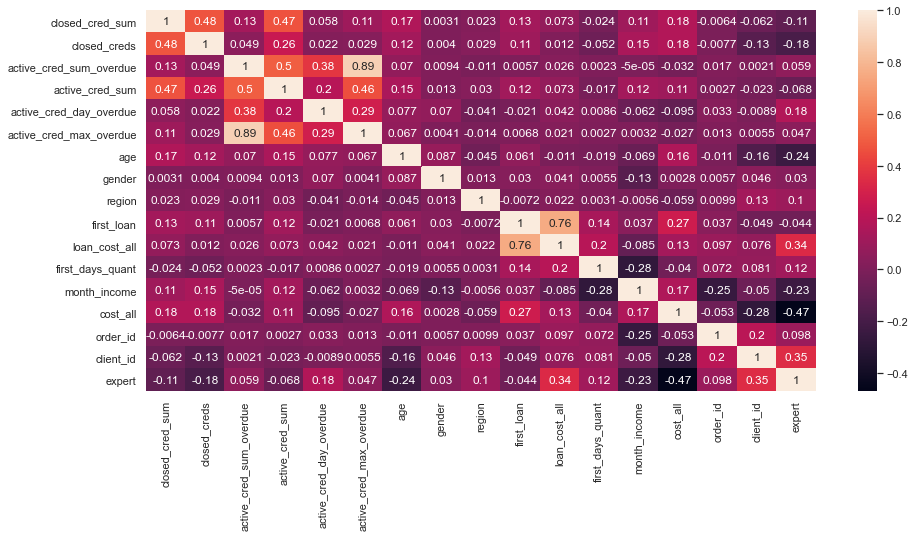

In [865]:
#Для начала посмотрим на матрицу корреляций числовых признаков для того, чтобы оценить расклад фич
sns.set(rc={'figure.figsize':(15, 7)}) 
sns.heatmap(data.corr(),annot = True);
#результирующий лейбл умеренно коррелирует (>0.3) только с loan_cost_all и с cliend_id

#высокая взаимосвязь (от 0.7 до 0.9) у признаков:
# а. active_cred_sum_overdue и active_cred_max_overdue что достаточно логично ибо из суммарной задолженности по активным кредитам формируется максимальная задолженность по активным кредитам 
# б. loan_cost_all и first_loan также закономерная зависимость ибо первая вытекает из второй 

In [866]:
#Приступим к анализу блока переменных, характеризующих кредитную историю клиента 
# 1. closed_cred_sum - сумма которую клиент выплатил по ранее взятым закрытым кредитам 

<AxesSubplot:>

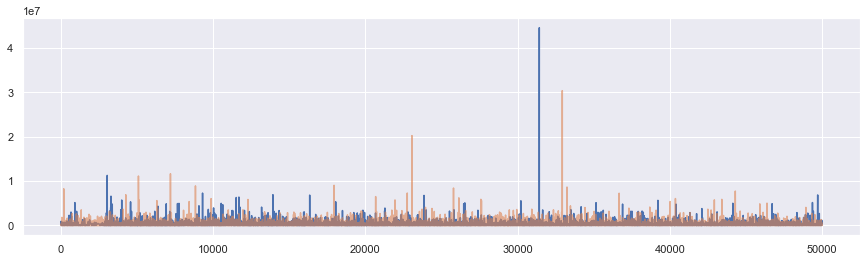

In [867]:
#посмотрим на распределение данных для тех заявок, что одобрены и не одобрены 
sns.set(rc={'figure.figsize':(15, 4)}) 
data.query('expert == 0').closed_cred_sum.plot()
data.query('expert == 1').closed_cred_sum.plot(alpha=0.6)
#зависимость из визуального анализа не заметна 

In [868]:
 pd.DataFrame({'-': data.query('expert == 1').closed_cred_sum.describe().apply(lambda x: format(x, 'f')), 
               '+': data.query('expert == 0').closed_cred_sum.describe().apply(lambda x: format(x, 'f'))})

-                +
count     31714.000000     11229.000000
mean     147921.350909    270471.228700
std      432906.117297    674371.515208
min           0.000000         0.000000
25%        2000.000000     20714.000000
50%       28999.000000     92800.000000
75%      124796.500000    288649.170000
max    30390879.000000  44574209.380000

In [869]:
#так как значения квантилей для отклоненных и одобренных значительно отличаются, разобьём значениям согласно квантилям для одобренных значений    

In [870]:
X['closed_cred_sum_Category'] = pd.cut(X['closed_cred_sum'], bins=[0, 20000, 90000, 290000, 45000000], include_lowest=True, labels=['1','2','3','4']).astype(int);

In [871]:
#Кол-во значений в каждой из получившихся категорий
X.closed_cred_sum_Category.value_counts()

1    16850
2    10761
3     8417
4     6915
Name: closed_cred_sum_Category, dtype: int64

In [872]:
# 2. closed_creds - количество закрытых кредитов

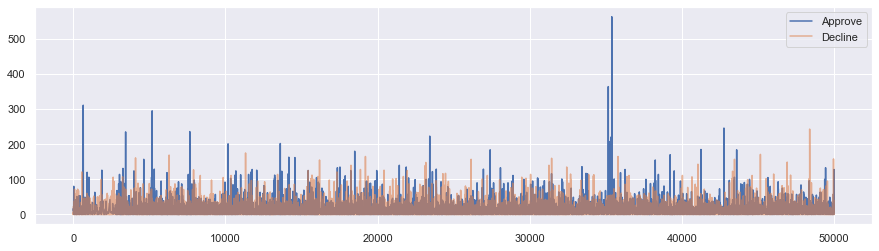

In [873]:
sns.set(rc={'figure.figsize':(15, 4)}) 
data.query('expert == 0').closed_creds.plot(label='Approve')
data.query('expert == 1').closed_creds.plot(alpha=0.6, label='Decline')
plt.legend()


<AxesSubplot:xlabel='expert', ylabel='closed_creds'>

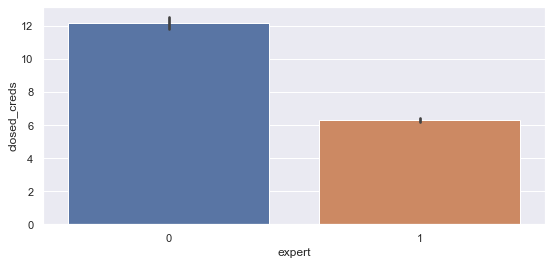

In [874]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.barplot(x='expert', y='closed_creds', data=data)

In [875]:
#из визуального анализа данного признака заметно зависимость, что чем больше кол-во закрытых кредитов, там больше у тебя будет одобренных заявок 

In [876]:
 pd.DataFrame({'-': data.query('expert == 1').closed_creds.describe().apply(lambda x: format(x, 'f')), 
               '+': data.query('expert == 0').closed_creds.describe().apply(lambda x: format(x, 'f'))})

-             +
count  31714.000000  11229.000000
mean       6.299268     12.178645
std       11.426447     18.783552
min        0.000000      0.000000
25%        1.000000      2.000000
50%        3.000000      7.000000
75%        7.000000     15.000000
max      243.000000    563.000000

In [877]:
#у 50% одобренных заявок кол-во кредитов не превышает 7 штук, сделаем бинарный признак по моде + столбца, если > 7= 1, <7 =0

In [878]:
X['binary_closed_creds'] = X['closed_creds'].apply(lambda x: 1 if x>7 else 0)

In [879]:
# 3. active_cred_sum_overdue - суммарная задолженность по активным кредитам
#Данным признак обязан быть показательным и хорошо разделять выборку, ибо на текущую задолженность точно необходимо смотреть при выдаче кредита 

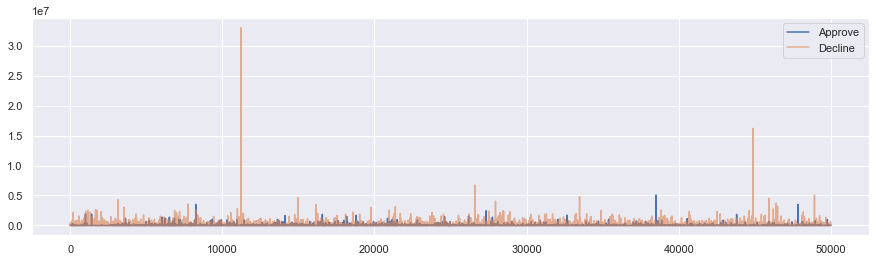

In [880]:
sns.set(rc={'figure.figsize':(15, 4)}) 
data.query('expert == 0').active_cred_sum_overdue.plot(label='Approve')
data.query('expert == 1').active_cred_sum_overdue.plot(alpha=0.6, label='Decline')
plt.legend()

<AxesSubplot:xlabel='expert', ylabel='active_cred_sum_overdue'>

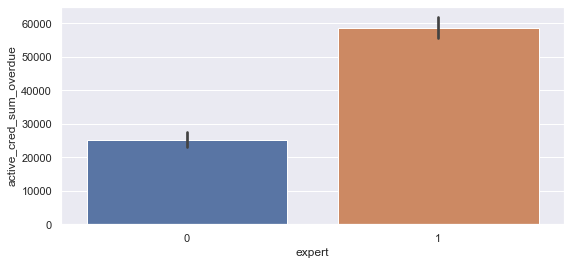

In [881]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.barplot(x='expert', y='active_cred_sum_overdue', data=data)

In [882]:
#Визуальный анализ: предоположение о том, что чем больше текущая задолженность, тем меньше вероятность получить новый кредит абсолютно верна 

In [883]:
 pd.DataFrame({'-': data.query('expert == 1').active_cred_sum_overdue.describe().apply(lambda x: format(x, 'f')), 
               '+': data.query('expert == 0').active_cred_sum_overdue.describe().apply(lambda x: format(x, 'f'))})

-               +
count     31714.000000    11229.000000
mean      58538.416364    25068.085877
std      277812.601061   122387.125711
min           0.000000        0.000000
25%           0.000000        0.000000
50%        9000.000000        0.000000
75%       39399.817500     6694.250000
max    33030999.240000  5068666.760000

In [884]:
#Можно легко создать бинарный признак, который разделит выборку на тех у кого задолженность больше 0 и меньше. Так как c 50% вероятностью у клиента одобрят кредит, если его просроченная сумма активных кредитов =
X['Binary_active_cred_sum_overdue'] = X['active_cred_sum_overdue'].apply(lambda x: 1 if x>0 else 0)

In [885]:
#4. active_cred_sum - сумма всех активных кредитов 

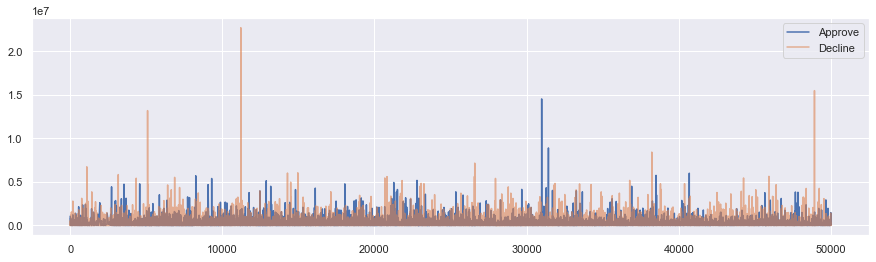

In [886]:
sns.set(rc={'figure.figsize':(15, 4)}) 
data.query('expert == 0').active_cred_sum.plot(label='Approve')
data.query('expert == 1').active_cred_sum.plot(alpha=0.6, label='Decline')
plt.legend()

<AxesSubplot:xlabel='expert', ylabel='active_cred_sum'>

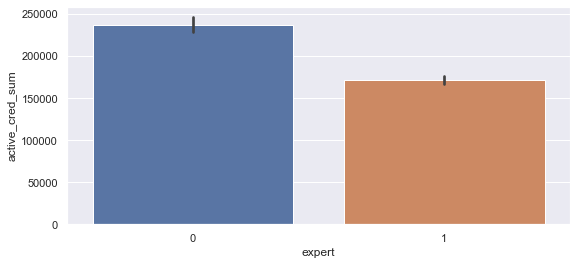

In [887]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.barplot(x='expert', y='active_cred_sum', data=data)

In [888]:
# Визуальный анализ: не показывает яркой взаимосвязи факторов, видно что чем больше сумма всех активных кредитов, тем с большей вероятностью одобрят заявку 

In [889]:
 pd.DataFrame({'-': data.query('expert == 1').active_cred_sum.describe().apply(lambda x: format(x, 'f')), 
               '+': data.query('expert == 0').active_cred_sum.describe().apply(lambda x: format(x, 'f'))})

-                +
count     31714.000000     11229.000000
mean     171480.771628    237382.864460
std      408290.606916    464105.599374
min           0.000000         0.000000
25%       12400.000000     17000.000000
50%       47500.000000     84990.000000
75%      162624.720000    264490.000000
max    22731655.240000  14546128.700000

In [890]:
#Вывод: можно ничего не менять или сделать бинарную классифиикаю по квантилю 50 для одобренных заявок или проделать нормализацию значений, пока сделаем просто классификацию 
X['Binary_active_cred_sum'] = X['active_cred_sum'].apply(lambda x: 1 if x>10000 else 0)

In [891]:
#5.active_cred_day_overdue - суммарная просрочка в днях по всем актуальным кредитам
#Признак должен хорошо разделять выборку, ибо обычно чем больше сумма просрочки по уже имеющимся кредитам, тем с меньшим желанием организация будет давать кредит 

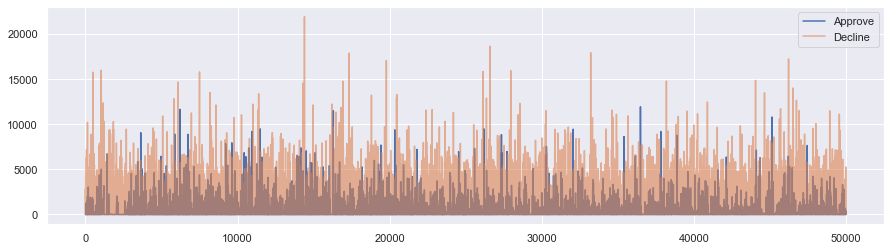

In [892]:
sns.set(rc={'figure.figsize':(15, 4)}) 
data.query('expert == 0').active_cred_day_overdue.plot(label='Approve')
data.query('expert == 1').active_cred_day_overdue.plot(alpha=0.6, label='Decline')
plt.legend()

<AxesSubplot:xlabel='expert', ylabel='active_cred_day_overdue'>

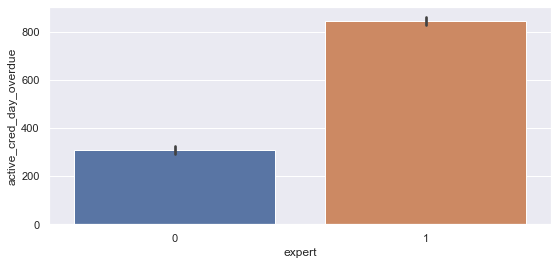

In [893]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.barplot(x='expert', y='active_cred_day_overdue', data=data)

In [894]:
# Визуальный анализ: достаточно наглядно можно видеть, что чем больше суммарная просрочка в днях по активным кредитам, тем с большей вероятностью отклонят заявку 

In [895]:
 pd.DataFrame({'-': data.query('expert == 1').active_cred_day_overdue.describe().apply(lambda x: format(x, 'f')), 
               '+': data.query('expert == 0').active_cred_day_overdue.describe().apply(lambda x: format(x, 'f'))})

-             +
count  31714.000000  11229.000000
mean     843.313710    307.086294
std     1443.946811    872.587022
min        0.000000      0.000000
25%        0.000000      0.000000
50%      186.000000      0.000000
75%     1101.000000     71.000000
max    21927.000000  11936.000000

In [896]:
#вывод: создаём бинарный признак, где если если значение больше 71 то 1
X['Binary_active_cred_day_overdue'] = X['active_cred_day_overdue'].apply(lambda x: 1 if x>0 else 0)

In [897]:
#6.active_cred_max_overdue - максимальная сумма просроченной задолженности по активным кредитам 

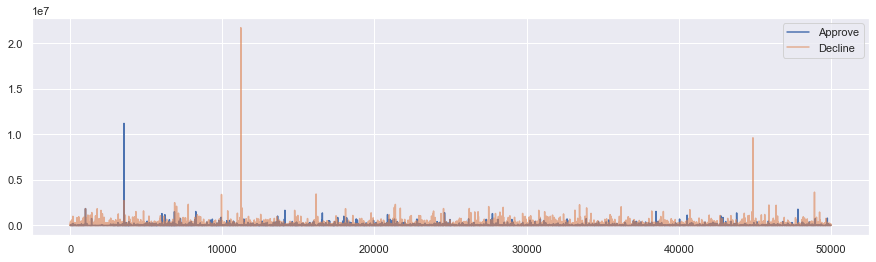

In [898]:
sns.set(rc={'figure.figsize':(15, 4)}) 
data.query('expert == 0').active_cred_max_overdue.plot(label='Approve')
data.query('expert == 1').active_cred_max_overdue.plot(alpha=0.6, label='Decline')
plt.legend()

<AxesSubplot:xlabel='expert', ylabel='active_cred_max_overdue'>

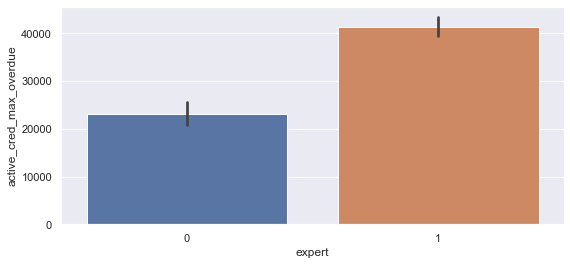

In [899]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.barplot(x='expert', y='active_cred_max_overdue', data=data)

In [900]:
# Визуальный анализ: картина достаточно сильно похожа на признак active_cred_sum_overdue, что поддтвердило найденную раннее корреляцию. 

In [901]:
 pd.DataFrame({'-': data.query('expert == 1').active_cred_max_overdue.describe().apply(lambda x: format(x, 'f')), 
               '+': data.query('expert == 0').active_cred_max_overdue.describe().apply(lambda x: format(x, 'f'))})

-                +
count     31714.000000     11229.000000
mean      41215.358057     23004.493526
std      180110.676091    133815.454629
min           0.000000         0.000000
25%        1500.000000         0.000000
50%        9000.000000      2542.270000
75%       29165.475000     11700.000000
max    21701655.240000  11200890.000000

In [902]:
# Вывод: разделить данные на 3-4 категории. Границы приближая к данным квантилей распределения 
X['Categories_active_cred_max_overdue'] = pd.cut(X['active_cred_max_overdue'], bins=[0, 2500, 11000, 25000000], include_lowest=True, labels=['1','2','3']).astype(int);

In [903]:
#7Создадим несколько дополнительных признаков, которые могут дополнительно помочь в классификации 
# A. Есть ли у клиента погашенные кредиты и активные кредиты, то есть участвовал ли он вообще в кредитных отношениях 
#Если сумма данных значений будет равна нулю значит нет погашенных и активных кредитов, следовательно новый клиент 
X['New_Client'] =  (X.closed_cred_sum + X.active_cred_sum).apply(lambda x: 1 if x==0 else 0)

#Б. на сколько суммарная задолженность по активным кредитам больше чем сумма, которую клиент выплатил по закрытым кредитам. Чем больше данное значение тем сложнее клиенту будет погасить задолженность, так как такой задолженность у него никогда не было. Если значение положительно, то значит клиент уже сталкивался с такой задолженностью и оплачивал её, если нет, то не закрывал кредиты на такие суммы и это риск давать новый кредит. 
X['New_Exp_in_Credit'] = (X.closed_cred_sum - X.active_cred_sum_overdue).apply(lambda x: 1 if x>0 else 0)

In [904]:
#Анализ перменных характеризующие клиента 

In [905]:
# 1. age - вероятнее всего, что чем старше клиент, тем меньше вероятность одобрения кредита 

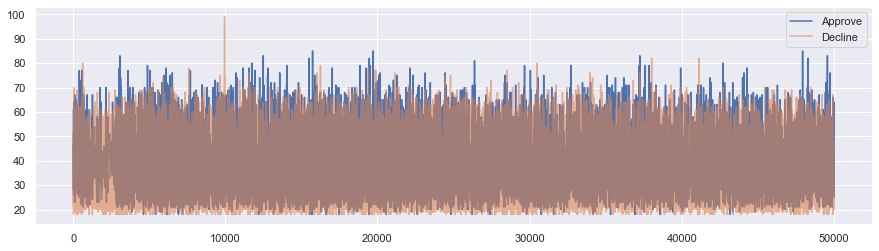

In [906]:
sns.set(rc={'figure.figsize':(15, 4)}) 
data.query('expert == 0').age.plot(label='Approve')
data.query('expert == 1').age.plot(alpha=0.6, label='Decline')
plt.legend()

<AxesSubplot:xlabel='expert', ylabel='age'>

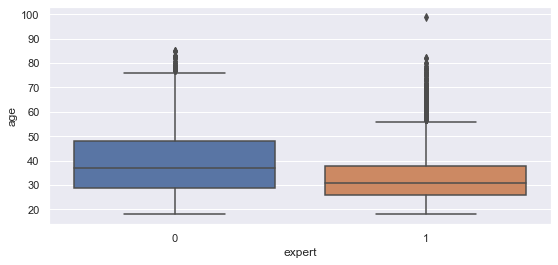

In [907]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.boxplot(x='expert', y='age', data=data)

In [908]:
# Визуальный анализ: возраст не является значимым фактором, потому как разделяет выборку по значению лейбла практически равнозначно 

In [909]:
 pd.DataFrame({'-': data.query('expert == 1').age.describe().apply(lambda x: format(x, 'f')), 
               '+': data.query('expert == 0').age.describe().apply(lambda x: format(x, 'f'))})

-             +
count  31714.000000  11229.000000
mean      33.410292     39.531659
std       10.182259     13.064350
min       18.000000     18.000000
25%       26.000000     29.000000
50%       31.000000     37.000000
75%       38.000000     48.000000
max       99.000000     85.000000

In [910]:
# Вывод: можно сделать бинарный признак с отметкой больше модального возраста для тех кому не дали кредит, 
X['Age_Threshold'] = X['age'].apply(lambda x: 1 if x<35 else 0)

In [911]:
# 2. gender 

<AxesSubplot:xlabel='expert', ylabel='gender'>

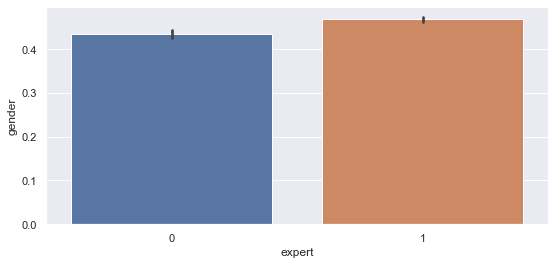

In [912]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.barplot(x='expert', y='gender', data=data)

In [913]:
# Вывод: статистика признака ничего не даёт, признак и так бинарен, еще и равно распределен по данным, можно вообще убрать. 
X = X.drop('gender', axis=1)

In [914]:
#3. region 

In [915]:
data.query('expert == 1').region.value_counts().head(10), data.query('expert == 0').region.value_counts().head(10)

(0     11811
 40     2012
 36     1348
 75     1166
 65     1135
 52      938
 80      881
 3       790
 46      706
 45      630
 Name: region, dtype: int64,
 0     5794
 40    1656
 80     394
 75     358
 52     302
 41     254
 36     246
 65     185
 3      147
 45     132
 Name: region, dtype: int64)

In [916]:
#Вывод: регион не имеет особо значения, можно создать разряженную матрицу со значениями, можно выкинуть, для первого варианта модели, просто выкенем это значение 
# X = X.drop('region', axis=1)

In [917]:
#4. Доход 
# Здесь должно быть неплохое разделение, потому что как  правило чем больше человек зарабатывает темб ольше ему дадут, также ранне был разработан признак включающий общую сумму заработка всех клиентов участвующих в заявке 


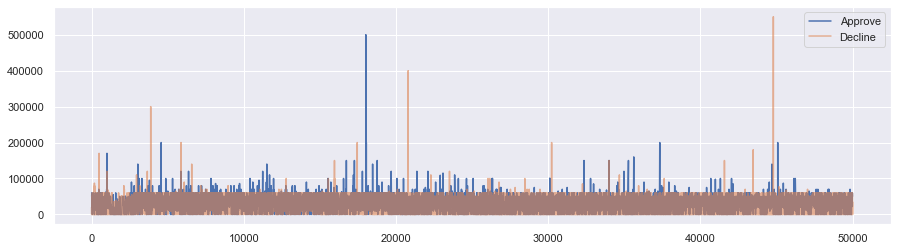

In [918]:
sns.set(rc={'figure.figsize':(15, 4)}) 
data.query('expert == 0').month_income.plot(label='Approve')
data.query('expert == 1').month_income.plot(alpha=0.6, label='Decline')
plt.legend()

<AxesSubplot:xlabel='expert', ylabel='month_income'>

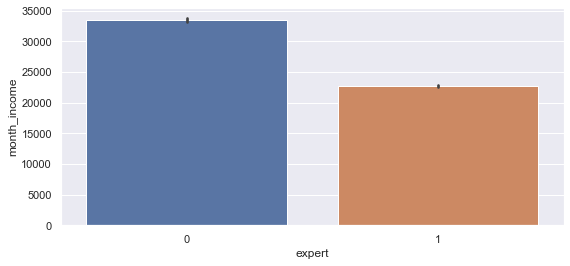

In [919]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.barplot(x='expert', y='month_income', data=data)

<AxesSubplot:xlabel='expert', ylabel='month_income'>

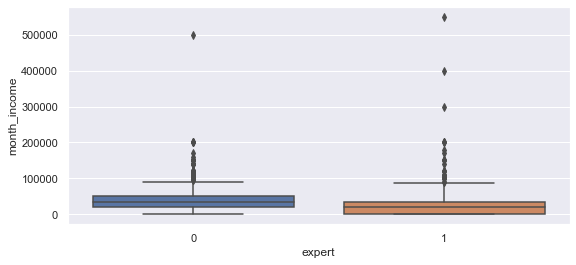

In [920]:
sns.boxplot(x='expert', y='month_income', data=data)

In [921]:
 pd.DataFrame({'-': data.query('expert == 1').month_income.describe().apply(lambda x: format(x, 'f')), 
               '+': data.query('expert == 0').month_income.describe().apply(lambda x: format(x, 'f'))})

-              +
count   31714.000000   11229.000000
mean    22702.479315   33457.258126
std     20497.061865   18464.901509
min         0.000000       0.000000
25%         0.000000   21000.000000
50%     20000.000000   35000.000000
75%     35000.000000   50000.000000
max    550000.000000  500000.000000

In [922]:
# Вывод: предположение не оправдалось, по одному доходу достаточно сложно классифицировать успех заявки. Данные столбца либо убирать, либо нормализовать. Применим нормализацию:
X['Income_Threshold'] = X.month_income.apply(lambda x: 1 if x<20000 else 0 )


In [923]:
#Аналих признаков относящихся к переменным, характеризующим кредит, по которому нужно сделать прогноз 

In [924]:
# 1. first_loan - сумма, которую клиент хочет получить в кредит 
# Скорее всего само по себе значение никак не может помочь в связке 

<AxesSubplot:xlabel='expert', ylabel='first_loan'>

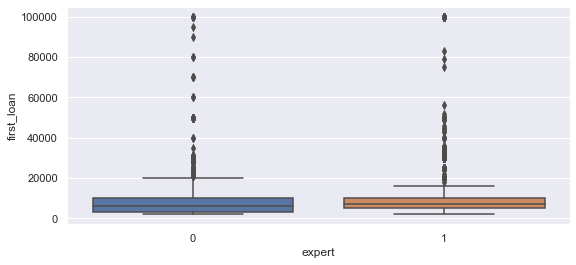

In [925]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.boxplot(x='expert', y='first_loan', data=data)

In [926]:
#максимальная запрошенная сумма равна 100000, значит анализ происходится либо для микрокредитной организации, либо из генеральной совокупности были убраны все сделки крупнее данной 
X.first_loan.sort_values(ascending=False)

20450    100000.0
3487     100000.0
3478     100000.0
30320    100000.0
26000    100000.0
           ...   
25794      2000.0
25760      2000.0
35185      1500.0
28101      1000.0
37811      1000.0
Name: first_loan, Length: 42943, dtype: float64

In [927]:
# Вывод: признак можно использовать в паре с признаком loan_cost_all, сделать один признак из разницы этих двух 
# если разница меньше 0 значитклиенту одобрена сумма больше чем он просит, если =0, то клиенту одобрена именна эта сумма, если <0, то сумму которую хочет клиент ему не получить даже в случае одобрения экспертом кредита 
X['DIfOfLoan_cost'] = (X.first_loan - X.loan_cost_all).apply(lambda x: 1 if x<=0 else 0 )



In [928]:
# 2. first_days_quant - срок на который клиент хочет взять кредит 

<AxesSubplot:xlabel='expert', ylabel='first_days_quant'>

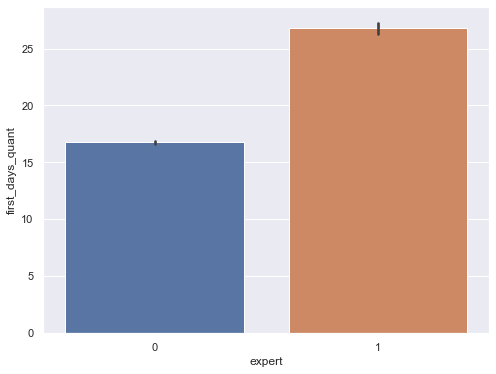

In [929]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.barplot(x='expert', y='first_days_quant', data=data)

<AxesSubplot:xlabel='expert', ylabel='first_days_quant'>

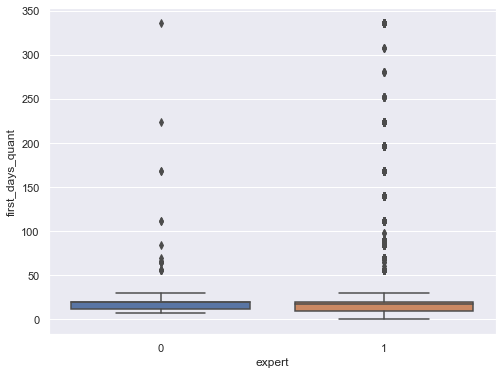

In [930]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.boxplot(x='expert', y='first_days_quant', data=data)

In [931]:
 pd.DataFrame({'-': data.query('expert == 1').first_days_quant.describe().apply(lambda x: format(x, 'f')), 
               '+': data.query('expert == 0').first_days_quant.describe().apply(lambda x: format(x, 'f'))})

-             +
count  31714.000000  11229.000000
mean      26.781138     16.756523
std       43.411828      7.151662
min        0.000000      7.000000
25%       10.000000     12.000000
50%       18.000000     20.000000
75%       20.000000     20.000000
max      336.000000    336.000000

In [932]:
# Вывод: признак на первый взгляд сам по себе бесполезен, имеет одинаковое распрделение среди обоих лейблов, но можно использовать в признаке, которые определяет риск возникновения просрочки по новому кредиту. Берется разница между суммарной просрочкой в днях для актуальных кредитов и данных показателем. Если значение положительное, то риск просрочки выше, так как известно что такого кол-ва дней клиенту не достаточно на погашение. Если число <=0, то риск просрочки меньше 

# Реально ли клиент сможет оплатить кредит в срок исходя из суммы которую он хочет и данных о зарплате. 
X['Ehough_Income_']=(X.first_loan - X.month_income* X.first_days_quant/30).apply(lambda x: 1 if x<=0 else 0 )

X['Risk_overdue_day'] = (X.active_cred_day_overdue - X.first_days_quant) 

In [933]:
# 3. order_date - дата подачи заявки, врядл-ли может что-то говорить или влиять на результат. Если только не рассчитываться сколько организация одобрила уже кредитов в определенный месяц, так как у любой кредитной организации есть лимиты по выдаче. Заменим даты просто на цифры по возрастанию 
X.order_date = preprocessing.LabelEncoder().fit_transform(X.order_date.astype(str))

In [934]:
# 4. cost_all - сумма всех выплат по одобренному кредиту 
#любопытно посмотреть ,на сколько больше новая долговая нагрузка зарплаты клиента за 6 месяцев. 
X['New_creditFor_income'] = X.cost_all - X.month_income*6

# Реально ли клиент сможет оплатит кредит в срок исходя из суммы всех выплат по одобренному кредиту  и данных о зарплате. 
X['Ehough_Income2']=(X.cost_all - X.month_income* X.first_days_quant/30).apply(lambda x: 1 if x<=0 else 0 )

In [935]:
#5. по признакам с id в самом начале были выполнены действия

In [936]:
# Всего признаков:
X.columns

Index(['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue',
       'active_cred_sum', 'active_cred_day_overdue', 'active_cred_max_overdue',
       'age', 'region', 'first_loan', 'loan_cost_all', 'first_days_quant',
       'month_income', 'order_date', 'cost_all', 'order_id', 'client_id',
       'expert', 'count_of_order', 'count_of_clients_in_order',
       'sum_salary_of_members', 'closed_cred_sum_Category',
       'binary_closed_creds', 'Binary_active_cred_sum_overdue',
       'Binary_active_cred_sum', 'Binary_active_cred_day_overdue',
       'Categories_active_cred_max_overdue', 'New_Client', 'New_Exp_in_Credit',
       'Age_Threshold', 'Income_Threshold', 'DIfOfLoan_cost', 'Ehough_Income_',
       'Risk_overdue_day', 'New_creditFor_income', 'Ehough_Income2'],
      dtype='object')

In [937]:
#Отделим признаковую часть от лейблов 
y = X.expert
X = X.drop('expert', axis=1) 

In [938]:
#Начальное признаковое поле без дубликатов, заменой пустых значений и преобразованием дат ROC 0.99655
# X = X.drop(['count_of_order', 'count_of_clients_in_order',
#        'sum_salary_of_members', 'closed_cred_sum_Category',
#        'binary_closed_creds', 'Binary_active_cred_sum_overdue',
#        'Binary_active_cred_sum', 'Binary_active_cred_day_overdue',
#        'Categories_active_cred_max_overdue', 'New_Client', 'New_Exp_in_Credit',
#        'Age_Threshold', 'Income_Threshold', 'DIfOfLoan_cost', 'Ehough_Income_',
#        'Risk_overdue_day', 'New_creditFor_income', 'Ehough_Income2'], axis=1)

#Признаковое поле со всеми изначальными и придуманными фичами ROC 0.99704
X

# Редактирование признакового поля после проверки важности признаков от функции Random Forest ROC 0.99711
# X = X.drop(['count_of_order', 'count_of_clients_in_order',
#       'closed_cred_sum_Category',
#        'binary_closed_creds', 'Binary_active_cred_sum_overdue',
#        'Binary_active_cred_sum',
#        'Categories_active_cred_max_overdue', 'New_Client', 'New_Exp_in_Credit',
#        'Age_Threshold', 'Income_Threshold', 'Ehough_Income_',   'order_date'
#      ], axis=1)
# X


closed_cred_sum  closed_creds  active_cred_sum_overdue  \
0            143822.00            22                   104.12   
1                 0.00             0                 38151.93   
2             51356.00             2                  3000.00   
3                 0.00             0                 22784.19   
4                 0.00             0                 22784.19   
...                ...           ...                      ...   
42938             0.00             0                 26758.57   
42939             0.00             0                 74662.61   
42940         21653.49             2                     0.00   
42941             0.00             0                     0.00   
42942         19750.00             9                 14100.00   

       active_cred_sum  active_cred_day_overdue  active_cred_max_overdue  age  \
0            130068.80                        8                   756.09   31   
1             46230.00                     1492                 38151.93   51   
2              3000.00                        8                  3000.00   28   
3             32103.52                      913                 22784.19   28   
4             32103.52                      934                 22784.19   29   
...                ...                      ...                      ...  ...   
42938         25000.00                      371                 26758.57   44   
42939         79662.61                     2593                 42204.55   27   
42940             0.00                        0                     0.00   28   
42941          1000.00                        0                   941.00   22   
42942         14100.00                      331                  6000.00   33   

       region  first_loan  loan_cost_all  ...  \
0          36     10000.0          10000  ...   
1          93     10000.0          10000  ...   
2           3     10000.0          10000  ...   
3          52     10000.0          10000  ...   
4           0     10000.0          10000  ...   
...       ...         ...            ...  ...   
42938      42      3000.0           1000  ...   
42939       0      4000.0           4000  ...   
42940      75      2000.0           2000  ...   
42941       0     10000.0          10000  ...   
42942      40      2000.0           2000  ...   

       Categories_active_cred_max_overdue  New_Client  New_Exp_in_Credit  \
0                                       1           0                  1   
1                                       3           0                  0   
2                                       2           0                  1   
3                                       3           0                  0   
4                                       3           0                  0   
...                                   ...         ...                ...   
42938                                   3           0                  0   
42939                                   3           0                  0   
42940                                   1           0                  1   
42941                                   1           0                  0   
42942                                   2           0                  1   

       Age_Threshold  Income_Threshold  DIfOfLoan_cost  Ehough_Income_  \
0                  1                 1               1               0   
1                  0                 0               1               1   
2                  1                 1               1               0   
3                  1                 1               1               0   
4                  1                 1               1               0   
...              ...               ...             ...             ...   
42938              0                 0               0               1   
42939              1                 1               1               0   
42940              1                 0               1               1   
42941      

In [939]:
#Так как модели которые планируется использовать это деревья решений в различных модификациях, то нет необходимости стандартизировать или нормализовать, первращать в матрицу признаковое поле 

In [940]:
#Деление датасета на обучающую часть и тестовую 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [426]:
#Тестирование различных моделей 

In [531]:
rf1 = RandomForestClassifier()
parameters = {'criterion': ['gini'],
             'n_estimators' : range(60, 100, 10),
             'max_depth': range(8 ,30, 2),
             'min_samples_split': range(10, 30, 2),
             'min_samples_leaf': range(5, 10)
             }
rsrf = RandomizedSearchCV(rf1, parameters, n_jobs=-1)

In [532]:
#Ранжирование признаков влиянию на результат 
rsrf.fit(X_train, y_train)
a = rsrf.best_estimator_.feature_importances_
feature_importances = pd.DataFrame({'feature': list(X_train), 
                                    "ranking": a})

feature_importances.sort_values('ranking', ascending=False)

feature   ranking
13                        cost_all  0.362933
18                  DIfOfLoan_cost  0.315545
9                    loan_cost_all  0.097628
15                       client_id  0.051017
8                       first_loan  0.029030
4          active_cred_day_overdue  0.021576
20            New_creditFor_income  0.015898
19                Risk_overdue_day  0.014681
2          active_cred_sum_overdue  0.014054
16           sum_salary_of_members  0.010300
1                     closed_creds  0.010239
21                  Ehough_Income2  0.009632
11                    month_income  0.008562
0                  closed_cred_sum  0.008444
10                first_days_quant  0.007448
3                  active_cred_sum  0.006227
6                              age  0.005016
17  Binary_active_cred_day_overdue  0.002901
7                           region  0.002639
5          active_cred_max_overdue  0.002564
14                        order_id  0.002009
12                      order_date  0.001660

In [107]:
xgb1 = XGBClassifier(objective="binary:logistic", random_state=42)

In [108]:
sgd1 = SGDClassifier(loss='log', random_state=17, n_jobs=-1, alpha=5e-06, max_iter=500)

In [109]:
Logistic1 = LogisticRegression(C=1, random_state=17, solver='lbfgs', n_jobs=-1, class_weight='balanced')

In [110]:
#Создание общей функции для одновременного теста нескольких моделей сразу с подсчётом метрик качества 

In [111]:
def Modelauc (model1, model2, model3, model4, X_train, X_test, y_train, y_test):
    pok = [] #список для вероятностей 
    pak=[] #список для бинарных значений
    model_list = [model1, model2, model3, model4]
    # model_list = [model1, model2] 
    for model in model_list:
        model.fit(X_train, y_train);
       
        a = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]);
        b = precision_score(y_test, model.predict(X_test));
        c = recall_score(y_test, model.predict(X_test));
        d = accuracy_score(y_test, model.predict(X_test));
        e = f1_score(y_test, model.predict(X_test));

        pok.append(model.predict_proba(X_test)[:, 1]);
        pak.append(model.predict(X_test))

        print('For model', str(model)[0:11], 'ROC_AUC=', a)
        print('For model', str(model)[0:11], 'Prec=', b)
        print('For model', str(model)[0:11], 'Recall=', c)
        print('For model', str(model)[0:11], 'Accuracy_score=', d)
        print('For model', str(model)[0:11], 'F1_score=', e)
        print('____________________________________________________')

      # return(pok)


In [533]:
Modelauc(rsrf, xgb1, sgd1, Logistic1, X_train, X_test, y_train, y_test)

For model RandomizedS ROC_AUC= 0.9970482893317048
For model RandomizedS Prec= 0.9885354265647593
For model RandomizedS Recall= 0.9985393844548774
For model RandomizedS Accuracy_score= 0.9902972910036483
For model RandomizedS F1_score= 0.9935122229719209
____________________________________________________
[21:29:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
D:\Python\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  war

In [219]:
# получились модели, которые  верно определяют долю дефолтных заемщиков (TPR = Recall), а также по метрике ROC можно судить об общей спосбности модели правильно оценивать заявки в общем виде, хоть и не исключена, в процессе деления на обучаюущую и тестовую выборки, выделение ещё одной выборки под которую совсем не подстраивается модель, значит есть некий процент переобученности, плюс несбалансированность классов изначально говорит о более высокой "стоимости" ошибки для одобренных заявок.  